# Домашнее задание 3

[x] [1 балл] Реализуйте чтение изображений, лежащих в /data/imgs/arrow (как в демо с калибровкой камеры с семинара). Вся обязательная часть задания выполняется с этими изображениями

[ ] [2 балла] Реализуйте нахождение расстояния от камеры до листка, учитывая, что это тот же листок, что был в первом демо

[ ] [3 балла] Реализуйте приведение изображения листка к "виду сверху"

[ ] [6 баллов] Реализуйте определение направления, в котором указывает стрелка. Можно использовать скелетонизацию из первого семинара по зрению: получить маску темной области (стрелки) внутри изображения листка, применить скелетонизацию, вычислить направление. Можно поступить иначе: после нахождения маски вычислить градиенты Собеля по x и y и проанализировать их направления. P.S. Можно использовать и полностью свой метод

[ ] [3 балла] Доп. задача 1: Примените написанный Вами код к видео https://drive.google.com/file/d/1AQhg2lL5FL4edlOcxY2SHOOZ-v9TgHBD/view?usp=sharing. Загрузите видео на свой гугл диск, а затем дополните имеющийся код монтированием диска и чтением в цикле кадров видео, приведёнными в конце семинара

[ ] [5 баллов] Доп. задача 2: определите, нормально ли видно листок в кадре. На некоторых кадрах его видно не полностью, один или больше уголков находятся за кадром. Это можно автоматически обнаруживать, к примеру используя размеры стрелки, и выводить на соответствующем кадре маркер - текст или цветную метку

In [1]:
!git clone -b develop https://github.com/AZhed/cvr_course.git

Cloning into 'cvr_course'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 203 (delta 0), reused 0 (delta 0), pack-reused 200
Receiving objects: 100% (203/203), 53.30 MiB | 31.77 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [2]:
cd cvr_course/notebooks

/content/cvr_course/notebooks


In [156]:
import numpy as np
import cv2
import time
import os
import math
import sys
import glob
from matplotlib import pyplot as plt

def find_contour (img, low_th, high_th):
    img_rgb = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
    
    mask = cv2.inRange (img, low_th, high_th)


    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 60))
    threshed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, rect_kernel)


    contours, hierarchy = cv2.findContours (threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours [0]

    approx = cv2.convexHull (cnt)

    epsilon = 0.05 * cv2.arcLength (approx, True)
    approx = cv2.approxPolyDP (approx, epsilon, True)

    return approx

def find_distance (img):
    low_th  = (200, 200, 200)
    high_th = (255, 255, 255)

    contour = find_contour (img, low_th, high_th)
    
    length = cv2.arcLength (contour, True)
    
    distance = 180.0 * 364 / length
    
    return distance

In [165]:
imgs = glob.glob ("../data/imgs/arrow/*.png")


for frame in imgs:
    img = cv2.imread(frame)
    
    low_th  = (200, 200, 200)
    high_th = (255, 255, 255)
    mask = cv2.inRange (img, low_th, high_th)

    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 60))
    threshed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, rect_kernel)

    contours, hierarchy = cv2.findContours (threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours [0]

    approx = cv2.convexHull (cnt)

    epsilon = 0.05 * cv2.arcLength (approx, True)
    approx = cv2.approxPolyDP (approx, epsilon, True)
    
    if len(contours) == 1:
        length = cv2.arcLength (approx, True)
        distance = 180.0 * 364 / length
    else:
        distance = 0.0

    print(distance)
    


86.98571825076148
94.81533612993083
0.0
0.0
91.01858143265916
0.0
0.0
87.928737139846
0.0
94.46607561991895


In [164]:
len(contours)

1

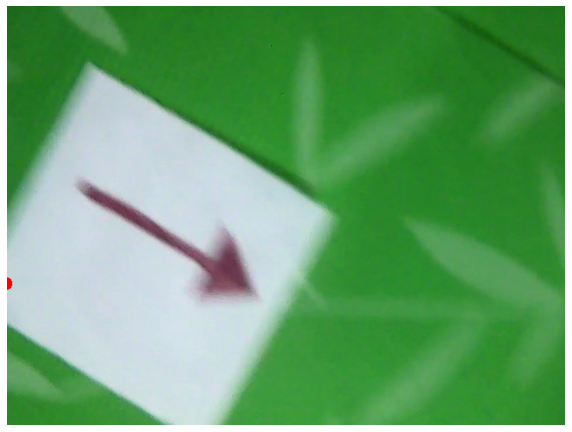

In [153]:
imgs = glob.glob ("../data/imgs/arrow/*.png")
plt.rcParams["figure.figsize"] = (10,10)

img = cv2.imread(imgs[5])
# img = cv2.cvtColor (img, cv2.COLOR_RGB2GRAY)

low_th  = (200, 200, 200)
high_th = (255, 255, 255)


mask = cv2.inRange (img, low_th, high_th)
# mask = cv2.Canny(mask, 200, 255 )

rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 30))
threshed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, rect_kernel)

contours, hierarchy = cv2.findContours (threshed, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
# cnt = contours[0]
approx = cv2.convexHull (cnt)
# epsilon = 0.05 * cv2.arcLength (approx, True)
# approx = cv2.approxPolyDP (approx, epsilon, True)

cv2.drawContours(img, contours, 0, (255, 0, 0), 8)


plt.imshow(img)
plt.axis('off')
plt.show()

In [154]:
len(contours)

3